# Monte Carlo Simulation


A Monte Carlo method is a technique that uses random numbers and probability to solve complex problems. 
The Monte Carlo simulation, or probability simulation, is a technique used to understand the impact of risk and 
uncertainty in financial sectors, project management, costs, and other forecasting machine learning models.

The Monte Carlo simulation allows us to see all the possible outcomes of our decisions and assess risk impact, in consequence allowing better decision making under uncertainty.

# Coin Flip

The probability of head for a fair coin is 1/2. Using Monte-Carlo method to simulate the coin-flipping iteratively 5000 times to find out why the probability of a head or tail is always 1/2. If we repeat this coin flipping many, many more times, then we can achieve higher accuracy on an exact answer for our probability value.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Coin flip function :

#0 --> Heads
#1 --> Tails

def coin_flip():
    return random.randint(0,1)

In [3]:
#Monte Carlo Simulation :

#Empty list to store the probability values.
simulation = []

def monte_carlo(n):
    results = 0
    for i in range(n):
        flip_result = coin_flip()
        results = results + flip_result
        
        #Calculating probability value :
        prob_value = results/(i+1)
        
        #Append the probability values to the list :
        simulation.append(prob_value)

        #Plot the results :
        plt.axhline(y=0.5, color='r', linestyle='-')
        plt.xlabel("Iterations")
        plt.ylabel("Probability")
        plt.plot(simulation)
       
    return results/n

10 Sim:  0.6
100 Sim:  0.49
500 Sim:  0.504
1000 Sim:  0.482
5000 Sim:  0.5064


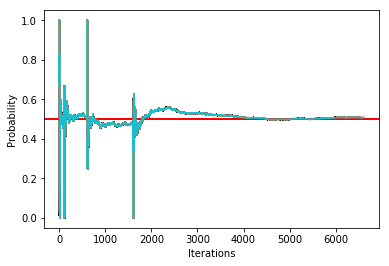

In [4]:
### Calling Simulation

probablity = monte_carlo(10)
print('10 Sim: ', probablity)

probablity = monte_carlo(100)
print('100 Sim: ', probablity)

probablity = monte_carlo(500)
print('500 Sim: ', probablity)

probablity = monte_carlo(1000)
print('1000 Sim: ', probablity)

probablity = monte_carlo(5000)
print('5000 Sim: ', probablity)

After 5000 iterations, the probability of getting a tail is 0.5064. Consequently, this is how we can use the Monte Carlo Simulation to find probabilities experimentally.


# Predict how much money we should budget for sales commissions for the next year.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
sns.set_style('whitegrid')

In [7]:
# Define the variables for the Percent to target based on historical results
avg = 1
std_dev = .1
num_reps = 500

In [8]:
# Show an example of calculating the percent to target
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

In [9]:
pct_to_target[0:10]

array([0.85, 0.96, 1.05, 0.97, 0.97, 1.08, 0.92, 0.94, 0.93, 0.79])

In [10]:
# Another example for the sales target distribution
sales_target_values = [75000, 100000, 200000, 300000, 400000, 500000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

In [11]:
sales_target[0:10]

array([300000,  75000, 300000, 200000, 400000,  75000, 200000, 200000,
       100000,  75000])

In [12]:
# Show how to create the dataframe
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})

df

,Pct_To_Target,Sales_Target
0,0.85,300000
1,0.96,75000
2,1.05,300000
3,0.97,200000
4,0.97,400000
...,...,...
495,0.91,500000
496,1.05,100000
497,1.06,100000
498,0.95,75000


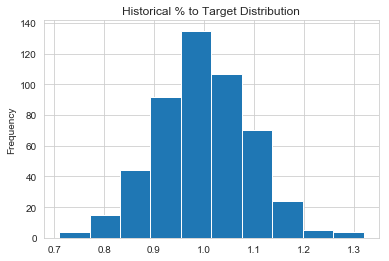

In [13]:
# Simple histogram to confirm distribution looks as expected
df['Pct_To_Target'].plot(kind='hist', title='Historical % to Target Distribution')

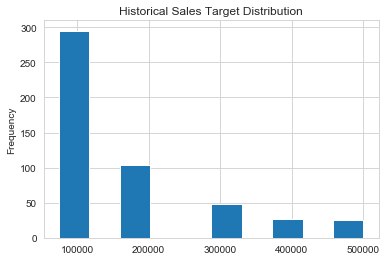

In [14]:
# Look at the sales target distribution
df['Sales_Target'].plot(kind='hist', title='Historical Sales Target Distribution')

In [15]:
# Back into the actual sales amount
df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

In [16]:
def calc_commission_rate(x):
    """ Return the commission rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

In [17]:
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)

df

,Pct_To_Target,Sales_Target,Sales,Commission_Rate
0,0.85,300000,255000.0,0.02
1,0.96,75000,72000.0,0.03
2,1.05,300000,315000.0,0.04
3,0.97,200000,194000.0,0.03
4,0.97,400000,388000.0,0.03
...,...,...,...,...
495,0.91,500000,455000.0,0.03
496,1.05,100000,105000.0,0.04
497,1.06,100000,106000.0,0.04
498,0.95,75000,71250.0,0.03


In [18]:
# Calculate the commissions
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

In [19]:
print(df['Sales'].sum(), df['Commission_Amount'].sum(), df['Sales_Target'].sum())

84775750.0 2905847.5 84650000


In [20]:
df.describe()

,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
count,500.00000,500.000000,500.000000,500.000000,500.000000
mean,0.99854,169300.000000,169551.500000,0.033440,5811.695000
std,0.09443,120495.012744,123379.075476,0.007448,4726.422779
min,0.71000,75000.000000,58500.000000,0.020000,1170.000000
25%,0.93750,75000.000000,80250.000000,0.030000,2842.500000
50%,1.00000,100000.000000,105000.000000,0.040000,4080.000000
75%,1.06000,200000.000000,212000.000000,0.040000,8240.000000
max,1.32000,500000.000000,590000.000000,0.040000,23600.000000


In [21]:
# Define a list to keep all the results from each simulation that we want to analyze
all_stats = []

num_simulations = 1000

# Loop through many simulations
for i in range(num_simulations):
    
    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)
    
    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})
    
    # Back into the sales number using the percent to target rate
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']
    
    # Determine the commissions rate and calculate it
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']
    
    # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append([df['Sales'].sum().round(0), 
                      df['Commission_Amount'].sum().round(0), 
                      df['Sales_Target'].sum().round(0)])

In [22]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales', 'Commission_Amount', 'Sales_Target'])

In [23]:
results_df.head(10)

,Sales,Commission_Amount,Sales_Target
0,78192000.0,2629062.0,78250000
1,83016750.0,2877038.0,82775000
2,78003750.0,2672100.0,77775000
3,84806000.0,2889295.0,84525000
4,87298750.0,3035680.0,86850000
5,82534250.0,2846040.0,82350000
6,83675000.0,2859300.0,83475000
7,84406750.0,2968262.0,83025000
8,84186500.0,2855330.0,84625000
9,84504500.0,2883665.0,84350000


In [24]:
results_df.describe().round(0).style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"83,792,355.0","2,861,434.0","83,793,850.0"
std,"2,684,991.0","101,496.0","2,650,880.0"
min,"75,638,750.0","2,574,818.0","75,550,000.0"
25%,"81,973,688.0","2,790,351.0","82,000,000.0"
50%,"83,847,625.0","2,863,508.0","83,800,000.0"
75%,"85,576,625.0","2,929,758.0","85,575,000.0"
max,"94,400,000.0","3,262,318.0","93,750,000.0"


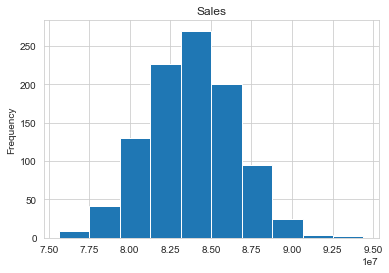

In [25]:
results_df['Sales'].plot(kind='hist', title="Sales")

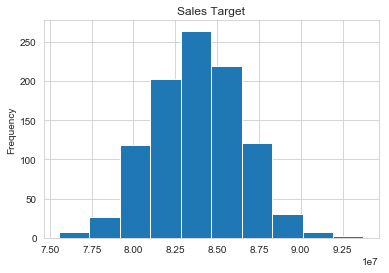

In [29]:
results_df['Sales_Target'].plot(kind='hist', title="Sales Target")

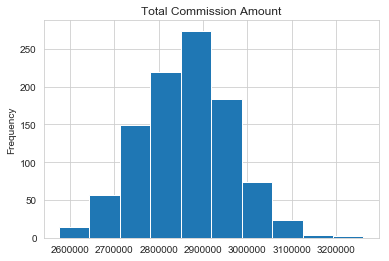

In [30]:
results_df['Commission_Amount'].plot(kind='hist', title="Total Commission Amount")

The average commissions expense is 2.85M and the standard deviation is $103K. We can also see that the commissions payment can be as low as 2.5M or as high as 3.2M.